In [1]:
pip install QuantLib-Python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np

K = int(input())                #輸入履約價格
r = float(input())              #輸入無風險利率
mat = float(input())            #輸入到期日
sigma = float(input())          #輸入波動率
a = float(input())              #輸入參數a
forward_rate = float(input())   #輸入forward rate
S0 = float(input())              #輸入股票當期價格
dt = 1/360
timestep = int(mat/dt)
day_count = ql.Thirty360()
todays_date = ql.Date(9,5,2020)
ql.Settings.instance().evaluationDate = todays_date

110
0.03
1
0.1
0.1
0.05
100


In [3]:
spot_curve = ql.FlatForward(todays_date, ql.QuoteHandle(ql.SimpleQuote(forward_rate)), day_count)
spot_curve_handle = ql.YieldTermStructureHandle(spot_curve)
hw_process = ql.HullWhiteProcess(spot_curve_handle, a, sigma)
rng = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(timestep, ql.UniformRandomGenerator()))
seq = ql.GaussianPathGenerator(hw_process, mat, timestep, rng, False)

In [4]:
def generate_paths(num_paths, timestep):
    arr = np.zeros((num_paths, timestep+1))
    for i in range(num_paths):
        sample_path = seq.next()
        path = sample_path.value()
        time = [path.time(j) for j in range(len(path))]
        value = [path[j] for j in range(len(path))]
        arr[i, :] = np.array(value)
    return np.array(time), arr

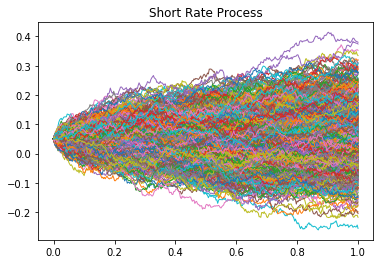

In [5]:
num_paths = 1000
time, paths = generate_paths(num_paths, timestep)
for i in range(num_paths):
    plt.title("Short Rate Process")
    plt.plot(time, paths[i, :], lw=1, alpha=1)
plt.show()

In [6]:
def genBrownPath (T, mu, sigma, S0, dt):
    
    n = round(T/dt)
    t = np.linspace(0, T, n)
    W = [0] + np.random.standard_normal(size = n)
    W = np.cumsum(W)*np.sqrt(dt) # == standard brownian motion
    X = (mu-0.5*sigma**2)*t + sigma*W
    S = S0*np.exp(X) # == geometric brownian motion
    plt.plot(t, S)
    return S

In [7]:
num_paths = 1000
time, rate_paths = generate_paths(num_paths, timestep)
#delete the last short rate at timestep n, due to data form calculation
time = np.delete(time,-1)
rate_paths = np.delete(rate_paths,-1,axis = 1)

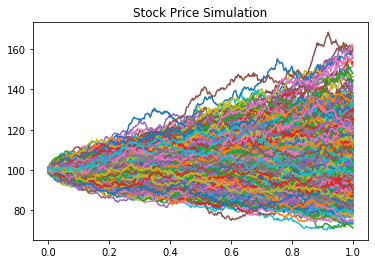

In [8]:
gbm_paths = []
for i in range(0,num_paths):
    np.random.seed(i)
    gbm_paths.append(genBrownPath(mat, rate_paths[i], sigma, S0, dt))

plt.title("Stock Price Simulation")
plt.show()

In [9]:
Call_value = []
for i in range(num_paths-1):
    Final_price = gbm_paths[i][-1]
    if Final_price - K > 0:
        X = Final_price - K
        Call_value.append(X + np.exp(-r*mat)*X)
print(np.sum(Call_value)/num_paths)

8.786952643303485


In [10]:
Put_value = []
for i in range(num_paths-1):
    Final_price = gbm_paths[i][-1]
    if K - Final_price > 0:
        X = K - Final_price
        Put_value.append(X + np.exp(-r*mat)*X)
print(np.sum(Put_value)/num_paths)

15.126673077315818
